In [1]:
library(SPATA)
library(SingleCellExperiment)
library(magrittr)
library(ggplot2)


Attaching package: ‘SPATA’


The following object is masked from ‘package:graphics’:

    image


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, row

In [2]:
sample_list <- c("151507", "151508", "151509",
               "151510", "151669", "151670",
               "151671", "151672", "151673",
               "151674", "151675", "151676")
res_list <- c()
base_path <- "/home/uqysun19/60days/Human_Brain_spatialLIBD/"

In [4]:
    sample <- sample_list[1]
    input_path <- paste0(base_path, sample)
    gt_path <- paste0(base_path, 
                  paste0(sample, 
                         paste0("/cluster_labels_",
                                paste0(sample, ".csv"))))
    ground_truth_df <- read.csv(gt_path)
    n_cluster <- length(unlist(unique(ground_truth_df["ground_truth"]))) - 1
    results_path <- paste0("/home/uqysun19/60days/Human_Brain_spatialLIBD/other_clustering/spata_results/", sample)
    dir.create(results_path, showWarnings = FALSE)

In [5]:
spata_obj <-
  initiateSpataObject_10X(input_paths = input_path, sample_names = "human_brain")

No gene-set data.frame path specified.

Step 1/6 : Reading in .h5 file.

Loading from directory: '/home/uqysun19/60days/Human_Brain_spatialLIBD/151507/outs'

Step 2/6: Extracting count matrices.

Step 3/6: Extracting images and coordinates-information.

Step 4/6: Performing Seurat-analysis steps.

Skip running SCTransform as it's argument input is neither TRUE nor a list.

Running 'Seurat::NormalizeData()' with specified parameters: 'normalization.method', 'scale.factor'

Running 'Seurat::FindVariableFeatures()' with specified parameters: 'selection.method', 'nfeatures'

Running 'Seurat::ScaleData()' with it's default parameters.

Centering and scaling data matrix

Running 'Seurat::RunPCA()' with specified parameters: 'npcs'

PC_ 1 
Positive:  GFAP, CRYAB, PLP1, MBP, MOBP, TF, VIM, CNP, KRT8, AGT 
	   GSN, RNASE1, MARCKSL1, PPP1R14A, MAG, ERMN, SELENOP, CXCL14, MOG, FABP4 
	   SPP1, HSPA2, FABP7, MUC1, CLDN11, CLDND1, PMP22, BCAS1, APOD, TMEM144 
Negative:  NRGN, SNAP25, VSNL1, MAP1B, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4226
Number of edges: 188303

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6772
Number of communities: 6
Elapsed time: 0 seconds


Running 'Seurat::RunTSNE()' with it's default parameters.

Running 'Seurat::RunUMAP()' with specified parameters: 'dims'

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:43:01 UMAP embedding parameters a = 0.9922 b = 1.112

17:43:01 Read 4226 rows and found 30 numeric columns

17:43:01 Using Annoy for neighbor search, n_neighbors = 30

17:43:01 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:43:02 Writing NN index file to temp file /var/tmp/pbs.114982.delta2/RtmpGnHjVY/file3ba636d64dd5

17:43:02 Searching Annoy index using 1 thre

In [6]:
monocle_clusters <- findMonocleClusters(object = spata_obj,
                                        preprocess_method = "PCA",
                                        reduction_method = c("PCA"),
                                        cluster_method = c("louvain"),
                                        k = 150,
                                        num_iter = 5)

Creating 'cell_data_set'-object.

Preprocessing cells with method 1/1 'PCA'

Using preprocess method 'PCA':

Reducing dimensions with reduction method 1/1: 'PCA' 

Using reduction method PCA:

Clustering barcode-spots with method 1/1: louvain

Done.



In [9]:
as.data.frame(monocle_clusters)

cluster_louvain_PCA_k150,barcodes
<chr>,<chr>
Cluster 5,AAACAACGAATAGTTC-1_human_brain
Cluster 3,AAACAAGTATCTCCCA-1_human_brain
Cluster 5,AAACAATCTACTAGCA-1_human_brain
Cluster 4,AAACACCAATAACTGC-1_human_brain
Cluster 3,AAACAGCTTTCAGAAG-1_human_brain
Cluster 3,AAACAGGGTCTATATT-1_human_brain
Cluster 4,AAACAGTGTTCCTGGG-1_human_brain
Cluster 3,AAACATTTCCCGGATT-1_human_brain
Cluster 1,AAACCACTACACAGAT-1_human_brain


In [23]:
    res <- 10
    for (i in 1:1000){
        monocle_clusters <- findMonocleClusters(object = spata_obj,
                                        preprocess_method = "PCA",
                                        reduction_method = c("PCA"),
                                        cluster_method = c("louvain"),
                                        k = res,
                                        num_iter = 5)
        n <- length(unlist(unique(monocle_clusters[1])))
        if (n > n_cluster) {
            res <- res + 1 
        }
        if (n < n_cluster) {
            res <- res - 1 
        }
        if (n == n_cluster) {
            print(res)
            break
        }
        print(n)
        print(n_cluster)
        print(res)
    }

Creating 'cell_data_set'-object.

Preprocessing cells with method 1/1 'PCA'

Using preprocess method 'PCA':

Reducing dimensions with reduction method 1/1: 'PCA' 

Using reduction method PCA:

Clustering barcode-spots with method 1/1: louvain

Done.



[1] 8
[1] 7
[1] 11


Creating 'cell_data_set'-object.

Preprocessing cells with method 1/1 'PCA'

Using preprocess method 'PCA':

Reducing dimensions with reduction method 1/1: 'PCA' 

Using reduction method PCA:

Clustering barcode-spots with method 1/1: louvain

Done.



[1] 11


In [24]:
        print(n)
        print(n_cluster)
        print(res)

[1] 7
[1] 7
[1] 11


In [26]:
colnames(monocle_clusters)[1]

[1] "cluster_louvain_PCA_k11"

In [27]:
spata_obj <-
  addFeatures(object = spata_obj,
              feature_names = colnames(monocle_clusters)[1],
              feature_df = monocle_clusters,
              key = "barcodes")

Joining 1 feature.

Done.



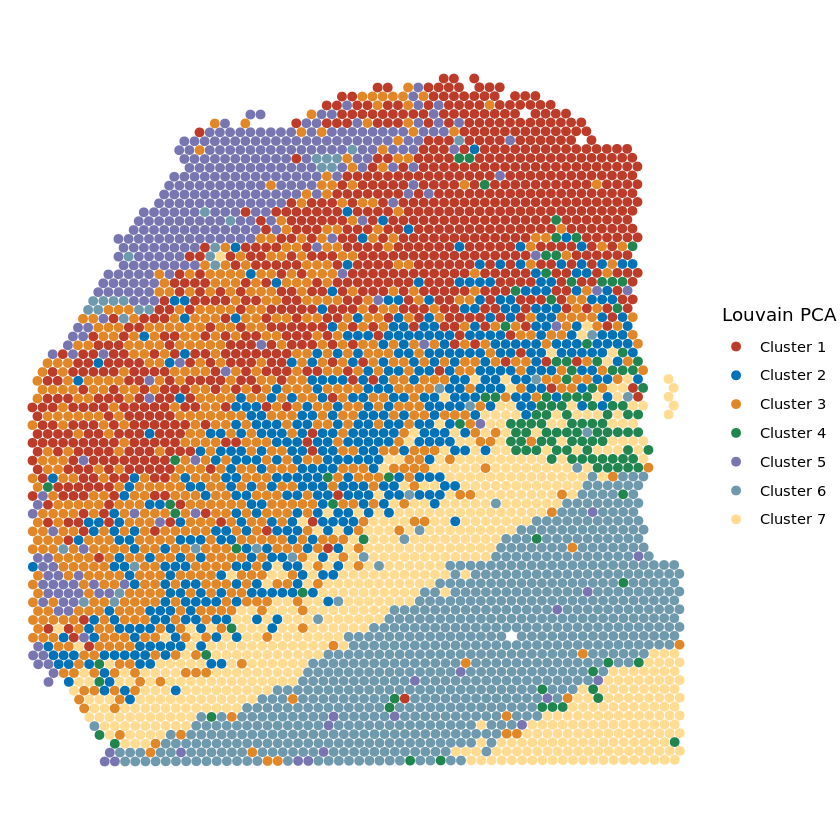

In [28]:
plotSurface(spata_obj,
            color_to = colnames(monocle_clusters)[1],
            pt_size = 2.1,
            pt_clrp = "nejm") +
  labs(color = "Louvain PCA")
# ggsave(paste0(results_path, "/clustering.png"), dpi=300)